In [4]:
# Similar Project 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

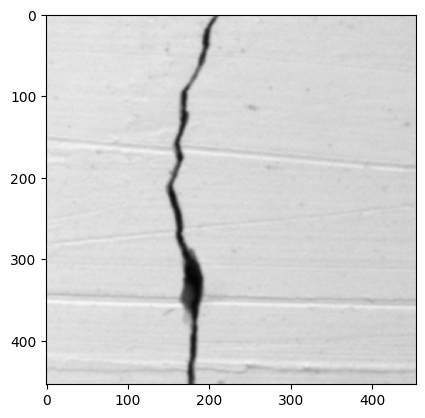

In [15]:
# Reading the Image
IMAGE_PATH = 'Images/crack_1.png'
img = cv2.imread(IMAGE_PATH)

plt.imshow(img)
plt.show()

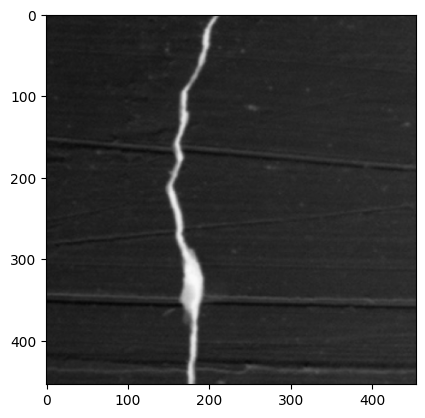

In [16]:
# Inverting the Image
img_inv = cv2.bitwise_not(img)

plt.imshow(img_inv)
plt.show()

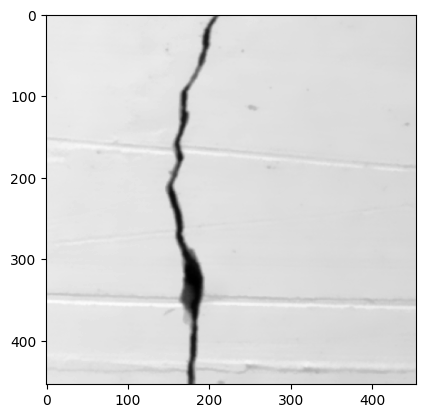

In [22]:
# Pre-Processing by Converting to Gray, Removal of Noise and Blurring
size = img.shape
max_size = max(size[0], size[1])
h = int(max_size/50)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.fastNlMeansDenoising(img_gray, None, h, 1, 21)
img_gray = cv2.GaussianBlur(img_gray, (1, 1), 0)

plt.imshow(img_gray, cmap = 'gray')
plt.show()

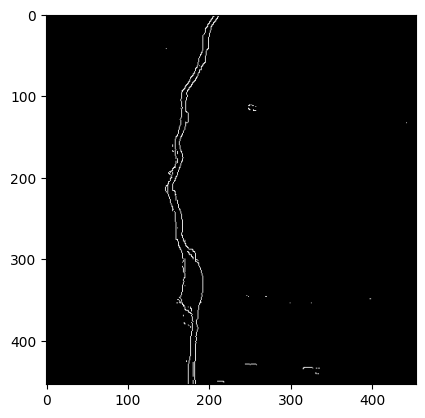

In [23]:
# Detecting the Edge
m = np.median(img)
average = np.average(img_gray)
sigma = 0.5
threshold_min = int(max(0, sigma * m))
threshold_max = int(min(255, sigma * m))

img_gray = cv2.Canny(img_gray, threshold_min, threshold_max)
# img_gray = cv2.Laplacian(img_gray, cv2.CV_8U, 1)
# img_gray = cv2.Sobel(img_gray, cv2.CV_8U, 1, 0, 51)
# img_gray = cv2.Scharr(img_gray, cv2.CV_8U, 1, 0)
# img_gray = cv2.HoughLines(img_gray, )

plt.imshow(img_gray, cmap = 'gray')
plt.show()

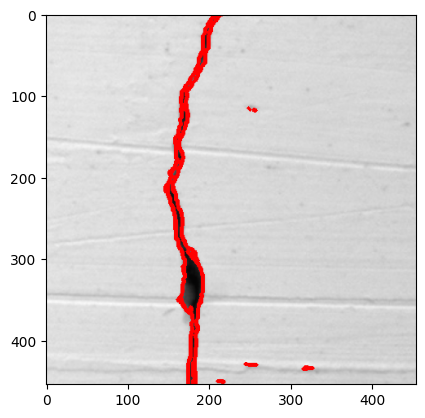

In [25]:
# img_thr = cv2.threshold(img_gray, threshold_min, threshold_max, cv2.THRESH_BINARY)[1]

contours = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)[0]

# img_contour = img_gray.copy()
# cv2.drawContours(img_contour, contours, 20, (0,0,255), 10)

valid_contours_indices = []
img_out = img.copy()

for i in range(len(contours)):
    c = contours[i]
    area = cv2.contourArea(c)
    (x1, y1, w, h) = cv2.boundingRect(c)
    neighbors = []
    for c2 in contours :
        (x2, y2, _, _) = cv2.boundingRect(c2)
        d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if (d < .5*max_size) :
            neighbors.append(c2)
    if ((len(neighbors) > 0.3*len(contours)) and (w+h>5) and (area <= ((size[0]*size[1])-100))):
        valid_contours_indices.append(i)
for i in valid_contours_indices:
    cv2.drawContours(img_out, contours, i, (255, 0, 0), 3)

plt.imshow(img_out)
plt.show()